# **Multilinear Regression**

Simple linear regression having multiple variables are known as Multi-Linear Regression. Step involved in the mutli-linear regression are almost similar to the step involved to simple linear 
The relationship between the multiple independent variables (X) and dependent variables (y)  is represented by the following equation: <br>
y = $\beta_0$ + $\beta_1X_1$ + $\beta_2X_2$ + ...... $\beta_nX_n$ + E <br>
Here, y is known as response/  dependent variable/ observation variable which we are going to estimate or predict <br>
$X_1$ , $X_2$ ... $X_n$ is the multiple independent / explanatory variables variables which we are going to make predictions. <br>

$\beta_1$ , $\beta_2$ ... $\beta_n$ is the slope coefficient for the explanatory variables. <br>

$\beta_0$ is the y-intercert (constant term)

E is ths models' error term also known as residuals error. <br>

Multi Linear regression model is based on the following assumptions:
    1. There is a lineare relationship between the dependent variables and indepdent variables.
    2. The independent variables are not highly correlated with each other.
    3. y observations are selected independently and randomly from the population.
    4. Residuals should be normally distributed with a mean of 0 and variance σ.
    

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Importing the dataset

The below command is used by Python's Pandas library is to import CSV dataset where imput features like 'R&D Spend', 'Admisnistration', 'Marketing Spend', and 'State'. Based on these features we will predict profit.

In [5]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Let's check number of rows and columns of our dataset where rows and columns are store as a tuple (number of rows, number of columns). In our imported dataset, there are 50 number of rows and 5 number of columns.

In [6]:
dataset.shape

(50, 5)

Pandas describe() methos is used to view to view some basic statistical details like percentile, mean, std etc.

In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


##  To know whether any cell value is empty or not

In [8]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

Our next task is to seperate features and label from our dataset. Our dataset contain 5 columns i.e. R&D Spend', 'Admisnistration', 'Marketing Spend', and 'State'. Based on these features we will predict profit where Profit is the dependent variables. <br>

y = dependent variable: Profit <br>
$X_1$ = R&D Spend <br>
$X_2$ = Administration
$X_3$ = Marketing Spend	
$\beta_0$ = y-intercept at time zero<br>
$\beta_1$ = regression coefficient that measures a unit change in the dependent variable when $X_1$ changes. The changes in the Profit when R&D change <br> 
$\beta_2$ = regression coefficient that measures a unit change in the dependent variable when $X_2$ changes. The changes in the Profit when Administration change <br> 
$\beta_3$ = regression coefficient that measures a unit change in the dependent variable when $X_3$ changes. The changes in the Profit when Marketing Spend change <br>

In the multi-linear regression model allows an analyst to predict an outcome based on information provided by the multiple explanatory variables.

E which is added to the last of the equations finds the difference between the actual profit and the predicted outcome, is included in the model to account for such slight variations.

In [14]:
features = dataset.drop("Profit", axis  = 1)
label = dataset.Profit
features.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


Now, I am going to check average value of Profit column.

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

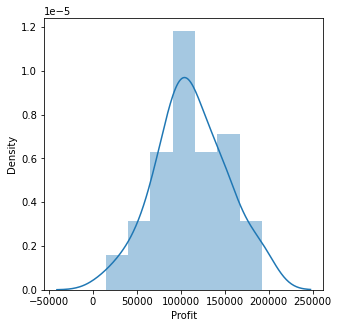

In [18]:
import seaborn as sns

plt.figure(figsize = (5,5))
plt.tight_layout()
sns.distplot(dataset['Profit'])

While importing our dataset, the 'State' column in the 3rd index of our dataset was presented in the form of text with the finite set of label values. So, for preprocessing sklearn provides OneHotEncoder library by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction which splits the column into multiple columns and the rumber are replaced by 1s and 0s. For rows which has the first column value as 'New York', the 'New York' column will have a  '1' and other two columns will have '0's. Similarly, for rows which have the first column value as 'California', the 'California' column will have a '1' and other two columns will have '0's.

first_row = "<b> New York </b>" <br>
second_row = "<b> California </b>"  
third_row = "<b> Florida </b> "

first_column = "<b> New York </b> " second_column = " <b> California </b> "  third_column = " <b> Florida </b>"
$$\begin{bmatrix} {New York}\ (1) & 0 & 0 \\ 0 & {California}\ (1) & 0 \\ 0 & 0 & {Florida}\ (1) \end{bmatrix}$$



In [19]:
encoded_features = pd.get_dummies(features)

In [21]:
encoded_features.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


skleran provides best function for partioning data into training test and testing test. We provide certain proportion of data to use as test set and we can provide the parameter random_state to ensure repeatable resuts. We split 80% of the data to the training set while 20% of data to the test using the below code. The test_size variable is where specify the propostion of the test set.

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(encoded_features, label,
                                                    test_size = 0.2,
                                                    random_state = 584)

After spliting data into train set and test set, now our job is to train our algorithm. For that we need to import LinearRegression to minimize the residual error of squares between the observed target in the dataset and the target predicted by the linear approximation. <br>
Now, call the fit() method along with our training data.
After training our algorithm, now time to make some predictions. For this we are going to use our test data and see how correctly our algorithms predicts the percentage score.

In [24]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

The below code retrive the slope of each independent variables. We have **SiX Independent** So we get Six Different Slops

In [26]:
print(regressor.coef_)

[ 8.38947725e-01 -4.30346933e-02  2.31597847e-02  4.04342385e+02
 -8.50379894e+02  4.46037509e+02]


**Validation**

In [28]:
y_pred = regressor.predict(X_valid) #y_predicted check with y_test

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(5)
df1

,Actual,Predicted
8,152211.77,151525.091979
12,141585.52,127336.793009
35,96479.51,89282.507944
18,124266.90,127172.482041
11,144259.40,135830.062704


We can use the bar graph to compare the results between the actual and predicted results. The number of record is guge, for visulizing the graph I am taking only 5 records. The below graph shows that our model has returned pretty good predictions results.

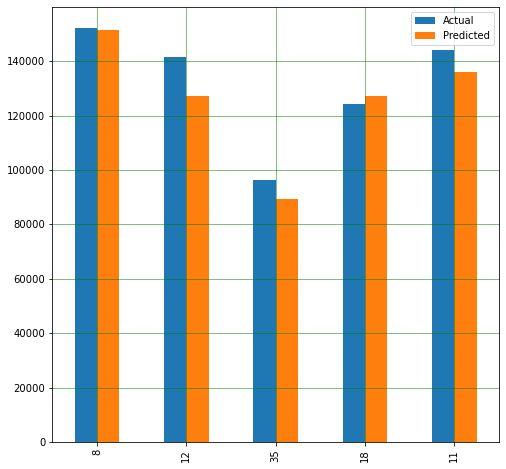

In [30]:
df1.plot(kind = 'bar', figsize = (8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The final step is to evaluate the performace of the algorithm. We will do this finding the values for MAE, MSE, and RMSE similarly, we have done in Simple Linear Regression.



In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8790.116840960314
Mean Squared Error: 103474053.34462066
Root Mean Squared Error: 10172.219686215032


Mean Absolute Error (MAE) , Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are the evaluation metrics  of linear regression to compare how well algorithm perform on a particular dataset.
    1. Mean Absolute Error (MAE): Mean of absolute value of the error which is calculated as:
MAE = $
\frac{1}n\sum_{i=1}^n|Y_i - y_i|
$

    2. Mean Squared Error: It is mean of the squared errors which is calculated as:
MSE = $
\frac{1}n\sum_{i=1}^n(Y_i - y_i)^2
$

    3. Root Mean Squared Error (RMSE): It is squared root of the mean of the squred errors and whihc is calculated as:
RMSE = $\sqrt{\frac{1}n\sum_{i=1}^n(Y_i - y_i)^2}$

Here, the root mean square value error is 10172.219686209179 which is smaller to the mean value of Profit i.e. 112012.639200. This means that our algorithms is very accurate for good predictions